# Test hands to open several hand compositions (genetic) 
### Some card classes
- Starters 
- Extenders
- Handtraps
- Non Engine Consistency (Pot cards)
- Board Breakers
### Assumption: 
- Pseudorandom shuffle of the deck in python is equivalent to a real shuffle

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
CLASSES = [
    {0: "Starters"},
    {1: "Extenders"},
    {2: "NonEngineConsistency"},
    {3: "HandTraps"},
    {4: "BoardBreakers"}
]
DECKSIZE = 40

In [124]:
def create_random_deck(n):
    deck = []
    for i in range(n):
        deck.append(np.random.randint(0, len(CLASSES)))
    return deck

def show_deck(deck):
    deck = deck.tolist()
    plt.figure(figsize=(10, 5))
    plt.title("Card Ratios for the Deck")
    plt.xlabel("Card Class")
    plt.ylabel("Number of Cards")
    for i in range(len(CLASSES)):
        plt.bar(CLASSES[i][i], deck.count(i))
        plt.text(i, deck.count(i), deck.count(i), ha = 'center', va = 'bottom')
    plt.show()

def show_deck_ratios(deck):
    deck = deck.tolist()
    scores = []
    for i in range(len(CLASSES)):
        # in percent
        scores.append(round(deck.count(i) / DECKSIZE * 100, 2))
    df = pd.DataFrame(scores, index=[CLASSES[i][i] for i in range(len(CLASSES))], columns=["Ratios"])
    print(df)

        

In [125]:
def objective_see_starter(hand):
    if 0 in hand:
        #print("Starter: ", 1)
        return 1
    else: 
        #print("Starter: ", 0)
        return 0
    
def objective_diversity(hand):
    diversity = len(set(hand))/len(hand)
    #print("Diversity: ", diversity)
    return diversity

def objective_hand(hand, alpha):
    fitness_hand = alpha*objective_see_starter(hand) + (1-alpha)*objective_diversity(hand)
    #print("Fitness: ", str(alpha) + "*" + str(objective_see_starter(hand)) + " + " + str(1-alpha) + "*" + str(objective_diversity(hand)) + " = " + str(fitness_hand))
    return fitness_hand

def fitness(deck, alpha):
    hands = []
    hands_scores = []
    for i in range (0, len(deck), 5):
        hand = deck[i:i+5]
        #print("Hand: ", hand)
        score = objective_hand(hand, alpha)
        hands.append(hand)
        hands_scores.append(score)
        #print("Score: ", score)

    return np.mean(hands_scores)

score = fitness(create_random_deck(DECKSIZE), 0.5)
print("Score for a random deck: ", score)

Score for a random deck:  0.6499999999999999


In [126]:
def crossover(parent1, parent2):
    child1 = np.zeros(DECKSIZE)
    child2 = np.zeros(DECKSIZE)
    # random int between 0 and decksize
    crossover_point = np.random.randint(0, DECKSIZE)
    child1[:crossover_point] = parent1[:crossover_point]
    child1[crossover_point:] = parent2[crossover_point:]
    child2[:crossover_point] = parent2[:crossover_point]
    child2[crossover_point:] = parent1[crossover_point:]
    return child1, child2

In [127]:
def mutate(deck, mutation_rate=0.01):
    for i in range(DECKSIZE):
        if np.random.uniform(0, 1) < mutation_rate:
            deck[i] = np.random.randint(0, len(CLASSES))
    return deck    

Generation:  0 Best Score:  0.9
Generation:  1 Best Score:  0.9125000000000001
Generation:  2 Best Score:  0.9
Generation:  3 Best Score:  0.9
Generation:  4 Best Score:  0.9
Generation:  5 Best Score:  0.9
Generation:  6 Best Score:  0.9125000000000001
Generation:  7 Best Score:  0.9
Generation:  8 Best Score:  0.9
Generation:  9 Best Score:  0.9
Generation:  10 Best Score:  0.8875000000000001
Generation:  11 Best Score:  0.9
Generation:  12 Best Score:  0.9
Generation:  13 Best Score:  0.8875
Generation:  14 Best Score:  0.8999999999999999
Generation:  15 Best Score:  0.9
Generation:  16 Best Score:  0.8875000000000001
Generation:  17 Best Score:  0.8875
Generation:  18 Best Score:  0.8875
Generation:  19 Best Score:  0.875
Generation:  20 Best Score:  0.8875000000000001
Generation:  21 Best Score:  0.8875000000000001
Generation:  22 Best Score:  0.8875
Generation:  23 Best Score:  0.9
Generation:  24 Best Score:  0.8875000000000001
Generation:  25 Best Score:  0.8875
Generation:  26

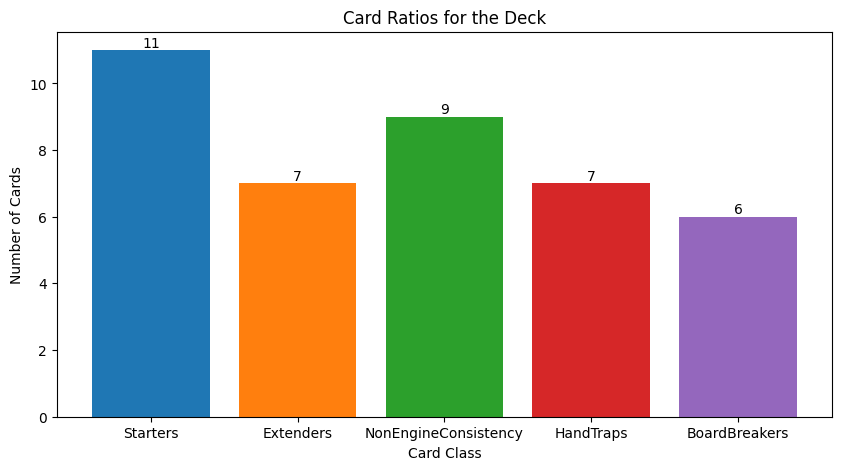

                      Ratios
Starters                27.5
Extenders               17.5
NonEngineConsistency    22.5
HandTraps               17.5
BoardBreakers           15.0


In [128]:
population = np.array([create_random_deck(DECKSIZE) for i in range(1000)])

best_deck = []
for i in range(500):
    fitness_scores = [fitness(deck, 0.5) for deck in population]
    best = np.argsort(fitness_scores)
    print("Generation: ", i, "Best Score: ", fitness_scores[best[-1]])
    best_deck = population[best[-1]]

    best_500 = np.array(best[-500:])
    parents = population[best_500]

    children = []
    for j in range(0, 500, 2):
        child1, child2 = crossover(parents[j], parents[j+1])
        children.append(child1)
        children.append(child2)

    mutated_children = []
    for child in children:
        mutated_children.append(mutate(child, 0.01))

    population = np.concatenate((parents, mutated_children))
    
    shuffled_decks = []
    for deck in population:
        np.random.shuffle(deck)
        shuffled_decks.append(deck)
    population = np.array(shuffled_decks)


show_deck(best_deck)
show_deck_ratios(best_deck)